In [36]:
import numpy as np
from matplotlib import pylab as plt
%pylab inline
#rc('font', size=12)

Populating the interactive namespace from numpy and matplotlib


/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e', 'plt', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [40]:
#Define common constants
M_sun = 1.989E30 #kg
M_star= 1*M_sun 

M_planet = 0 #negligible
M_Jup = 1.898E27 #kg
M_Earth = 5.972E24 #kg
M_Neptune=1.024E26 #kg

R_sun = 696300000 #m
R_Jup = 69911000 #m 
R_Neptune = 24622000 #m
R_Earth = 6371000 #m

G = 6.67E-11 #
AU = 1.496E11 #m

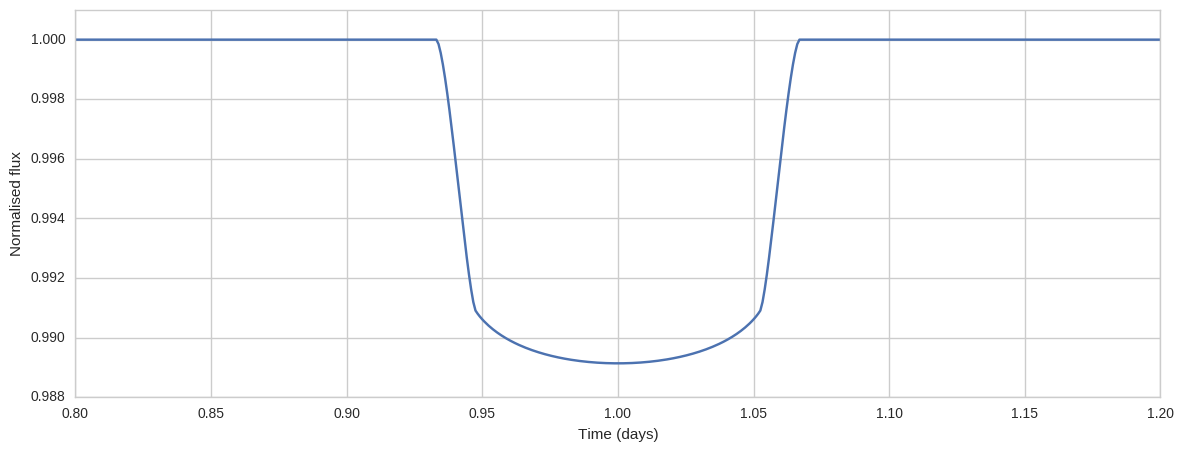

In [61]:
import numpy as np
from pytransit import MandelAgol

t = np.linspace(0.8,1.2,500)
k  = 0.1
t0 = 1.
p  = 4 #

a  = 8 
i  = 0.48*np.pi
e  = 0.2
w  = 0.5*np.pi
u  = [0.25,0.10]

MA = MandelAgol()
f = MA.evaluate(t, k, u, t0, p, a, i, e, w)

import seaborn as sb
with sb.axes_style('whitegrid'):
    fig, ax = subplots(figsize=(14,5))
    ax.set_ylim([0.988, 1.001])
    ax.plot(t,f)
    ax.set_ylabel('Normalised flux')
    ax.set_xlabel('Time (days)')

The MandelAgol.evaluate method offers a direct way for the calculation of the light curve as a function of time t. It uses a circular orbit model if eccentricity is close to zero (smaller than 1e-5), and slower eccentric orbit model with non-zero eccentricities.

The MandelAgol._ _call_ _ method offers a way to evaluate the transit model as a function of normalised projected distance z. This is useful if we don't want to recalculate the orbit but change the limb darkening coefficients or contamination factor, or if we have a better (faster) method for the calculation of z than provided by the package.

# Let's investigate the effect of changing the fitting parameters one by one:

In [121]:
#Earth to brown dwarf boundary (analog for radius, not mass) in multiples of R_Earth
k1 = 0.1 #typical value ~ R_Earth/R_sun 
#k2 = np.linspace(R_Earth/R_sun, 0.5, 100) #13*R_Jup is bigger than solar diameter

k2 = array([[R_Earth/R_sun*i] for i in range(10)]) #10 sets
print(k2)

[[ 0.        ]
 [ 0.00914979]
 [ 0.01829958]
 [ 0.02744938]
 [ 0.03659917]
 [ 0.04574896]
 [ 0.05489875]
 [ 0.06404854]
 [ 0.07319833]
 [ 0.08234813]]


In [5]:
u  = [0.4,0.1] #arbitrarily chosen
t0 = 1
p  = 2*365
a = 30.1*AU
i = 0.5*np.pi
e = 0
w = 0#.5*np.pi

In [146]:
t = np.linspace(t0-duration,t0+duration,100)

Note that k2 & t should have the same dimensions that's why I used linspace.

In [147]:
k_i = md.evaluate(t, k1, u, t0, p, a, i, e, w)
k_set = md.evaluate(t, k2, u, t0, p, a, i, e, w)
k_set.shape

(100,)

The depth of transit should be:

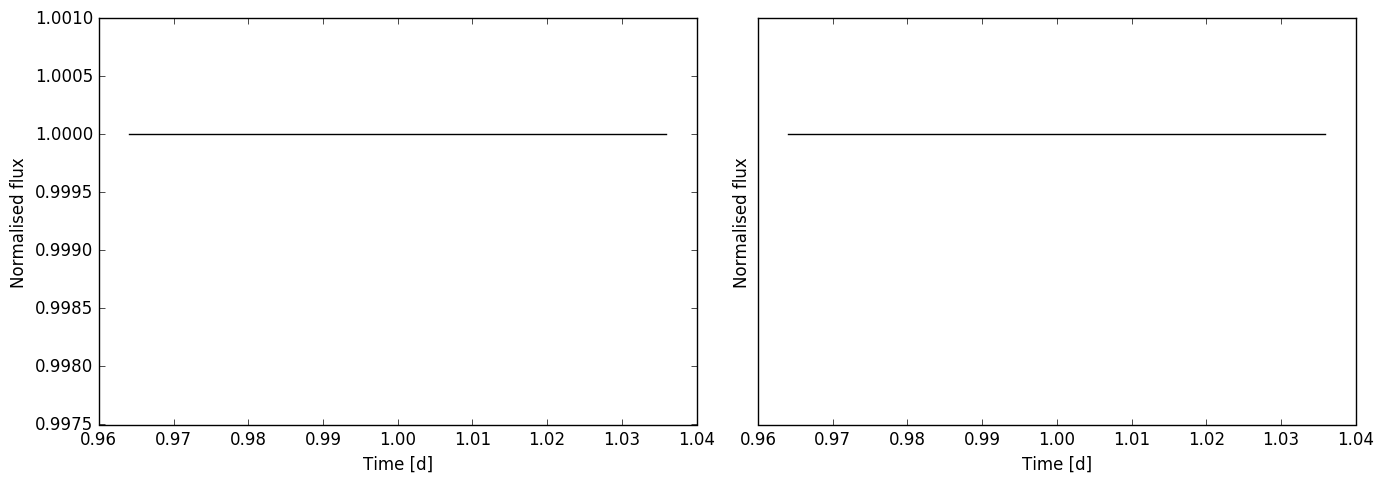

In [149]:
fig,ax = subplots(1,2,figsize=(14,5))
#lightcurve 
ax[0].plot(t, k_i, 'k');
#10 curves with various limb darkening coeffs
ax[1].plot(t, k_set, 'k');
setp(ax[0], ylim=(1-2*delta,1.001), 
     xlabel='Time [d]', ylabel='Normalised flux');#, 
     #title='Light curve for a single set of limb darkening coefficients');
setp(ax[1], ylim=(1-2*delta,1.001), 
     yticks=[], xlabel='Time [d]', ylabel='Normalised flux');#, 
     #title='Light curve for a set of multiple limb darkening coefficients');
#change 
fig.tight_layout()
#fig.savefig('model_example_1.png')

# 1. 
Polly Photometer studies the star psi Cap. She has heard that this star has a Neptune-like planet orbiting it with a period of 2 years.

### a. Create a graph showing the (theoretical) V-band light curve of this star during a transit. Make sure that your scales on the time and magnitude axes are accurate.


Psi Capricorni ($\psi$ Cap, $\psi$ Capricorni) is a star in the constellation Capricornus. $\psi$ Cap is a yellow-white **F-type main sequence dwarf** with an apparent magnitude of M = +4.13. It is approximately d=47.9 light years from Earth. The measured rotational velocity of this star is approximately $v_{\mathrm{rot}}$ = 41 km/s[6] (the Sun has an equatorial rotation velocity of 2 km/s). Analysis of the line profile of the star's spectrum indicates that it is undergoing differential rotation, with the variation by latitude being similar to the Sun.

References:
Habets, G. M. H. J.; Heintze, J. R. W. (November 1981). "Empirical bolometric corrections for the main-sequence". Astronomy and Astrophysics Supplement. 46: 193–237. Bibcode:1981A&AS...46..193H

In [159]:
def orb_rad(M_s, M_p, p):
    return (G*(M_s+M_p)/(4*np.pi**2)*p**2)**(1/3)

a_kep = orb_rad(M_sun, M_Neptune, p_in_sec)
print('a = {} AU'.format(a_kep/AU))

def delta(R_p,R_s):
    return (R_p/R_s)**2
delta = delta(R_Neptune,R_sun)

p_in_day = 2*365 #period = 2 years in days 
p_in_sec = 2*365*24*60*60

def transit_time(R_s, R_p, a, p):
    return p*(R_s*np.cos(delta)+R_p)/(np.pi*a)
duration = transit_time(R_sun, R_Neptune, a_kep, p_in_day)

def P_trans(a, R_s, R_p, e, w):
    return (a/(2*(R_s+R_p)))*((1-e*np.cos(np.pi/2)-w)/(1-e**2))

P_t = P_trans(a_kep, R_sun, R_Neptune, e, w)

print('transit depth = {0:.4f}'.format(delta))
print('transit duration = {0:.3f} days'.format(duration))
print('transit probability, p_trans = {0:.3f}'.format(P_t))

a = 1.5864773925282294 AU
transit depth = 0.0013
transit duration = 0.706 days
transit probability, p_trans = -93.957


In [202]:
a_kep/R_sun

340.8545424705201

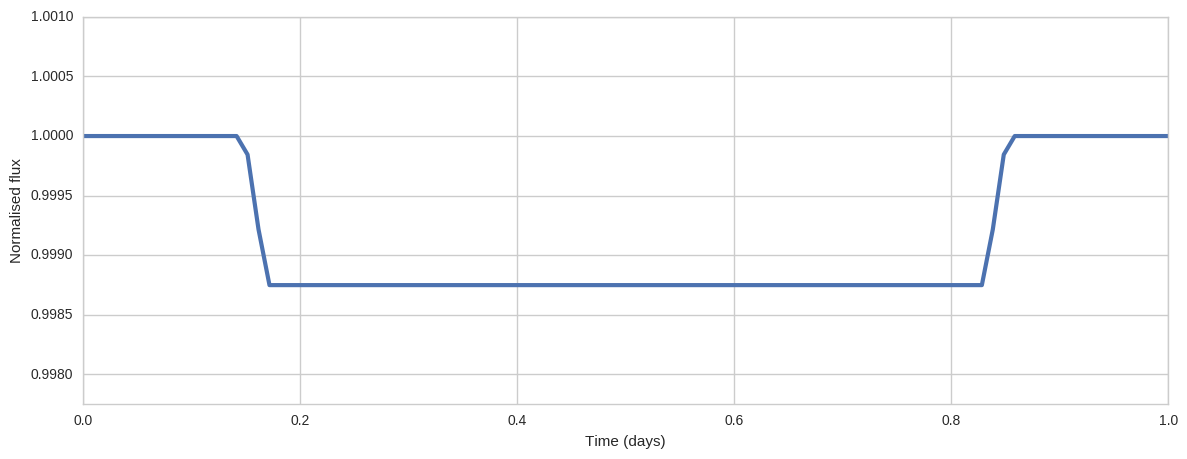

In [168]:
import numpy as np
from pytransit import MandelAgol

t = np.linspace(0,1,100) #days
k  = R_Neptune/R_sun #scaled semi-major axis
t0 = 0.5             #arbitrary
p  = p_in_day
i  = 0.5*np.pi
e  = 0
w  = 0.5*np.pi
u  = [0,0]

MA = MandelAgol()
f = MA.evaluate(t, k, u, t0, p, a_kep/R_sun, i, e, w)

import seaborn as sb
with sb.axes_style('whitegrid'):
    fig, ax = subplots(figsize=(14,5))
    ax.set_ylim([1-k**2 - 0.001, 1.001])
    ax.plot(t,f, lw=3)
    ax.set_ylabel('Normalised flux')
    ax.set_xlabel('Time (days)')

### b. Create a graph showing the (theoretical) V-band light curve of this star during one full orbit of the planet. Assume that the albedo of the planet's clouds is a = 0.5. Make a closeup around the time of the secondary eclipse (= occultation = when the planet goes behind the star). Make sure that your scales on the time and magnitude axes are accurate.

In [302]:
T_eff = 6600
log_g = 4.2

sigma = 5.670367E-8

def flux_s(T_eff):
    return sigma*T_eff**4
f_s = flux_s(T_eff)

print('total flux from the star = {} W/m2'.format(f_s))

def irradiance(f_s, R_p, a):
    return (f_s*(R_p/a)**2)
E_s = irradiance(f_s, R_Neptune, a_kep)#7*AU)

print('flux received by, irradiated onto the planet \n= {} W/m^2'.format(E_s))

albedo = 0.5

def flux_p(E_s, R_p, alb):
    return E_s*(1-alb)

f_p= flux_p(E_s, R_Neptune, albedo)
print('flux from planet = {} W/m^2'.format(f_p))

total flux from the star = 107593716.84811199 W/m2
flux received by, irradiated onto the planet 
= 1.157984115318943 W/m^2
flux from planet = 0.5789920576594715 W/m^2


In [296]:
L_s = f_s*4*np.pi*R_sun**2
L_p = f_p*4*np.pi*R_p**2

contrast = f_p/f_s
print('flux contrast = {}'.format(contrast))
print('luminosity contrast = {}'.format(L_p/L_s))

flux contrast = 4.303599339166583e-06
luminosity contrast = 9.522169719436042e-08


In [307]:
def delta_V(f_s, f_p):
    return -2.5*np.log((f_s-f_p)/(f_s+f_p))

delta_V(f_s,f_p)

2.6906406414468712e-08

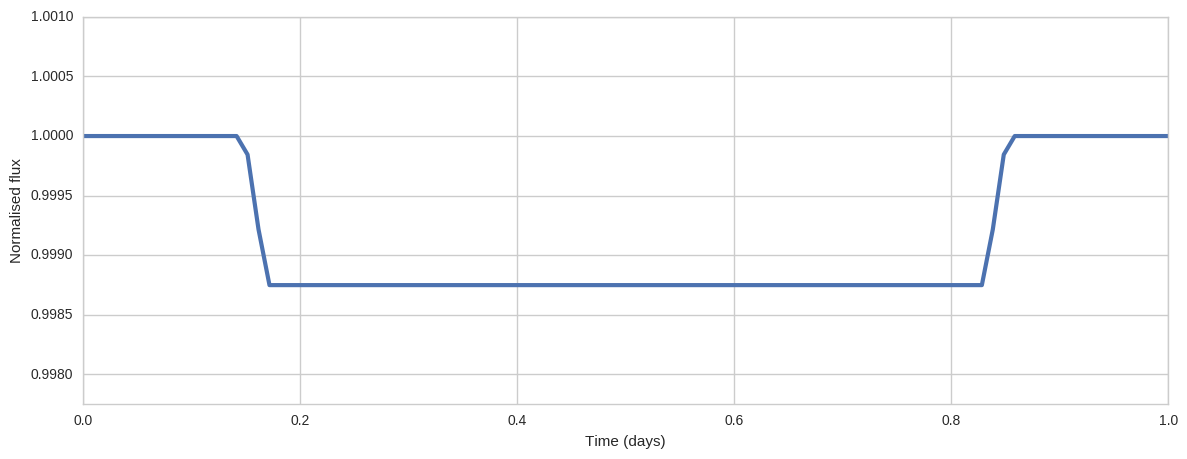

In [232]:
import numpy as np
from pytransit import MandelAgol

t = np.linspace(0,1,100) #days
k  = R_Neptune/R_sun #scaled semi-major axis
t0 = 0.5             #arbitrary
p  = p_in_day
i  = 0.5*np.pi
e  = 0
w  = 0.5*np.pi
u  = [0,0]

MA = MandelAgol()
f = MA.evaluate(t, k, u, t0, p, a_kep/R_sun, i, e, w)

import seaborn as sb
with sb.axes_style('whitegrid'):
    fig, ax = subplots(figsize=(14,5))
    ax.set_ylim([1-k**2 - 0.001, 1.001])
    ax.plot(t,f, lw=3)
    ax.set_ylabel('Normalised flux')
    ax.set_xlabel('Time (days)')

### c. Bonus! Polly has access to a 1-m space telescope with an expensive CCD. Should she apply for time to observe this star and actually confirm the presence of this planet? Should she ask for time around both primary and secondary eclipses? Justify your answer.

# 2.
Polly decides to look at a different star instead. She acquires the following photometric measurements during one transit. Answer the following as well as you can; include uncertainties where possible.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

filename='sample_transit.dat'
df = pd.read_csv(filename,delim_whitespace=True)# error_bad_lines=False, skiprows=?
df.head()

df.columns = ['t','f']
t =df.t
f =df.f

Populating the interactive namespace from numpy and matplotlib


In [4]:
df.head()

,t,f
0,2.456734e+06,0.999600
1,2.456734e+06,1.001299
2,2.456734e+06,0.998397
3,2.456734e+06,0.998795
4,2.456734e+06,0.999893


### a. What is the depth of this transit?

/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


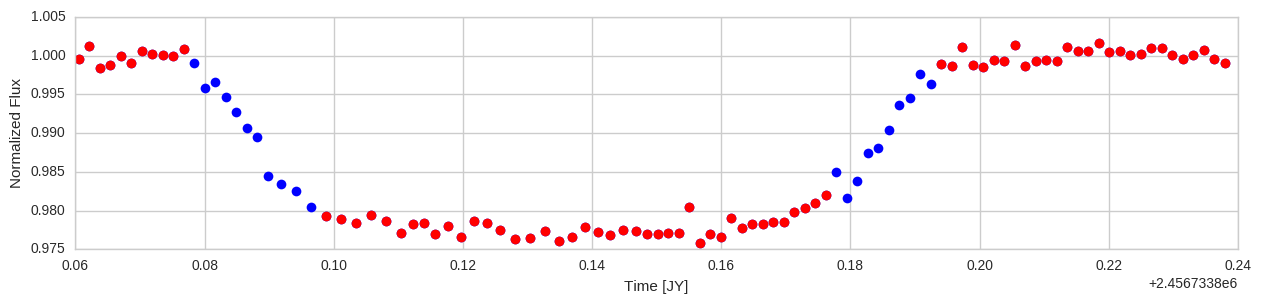

In [5]:
#Estimate loc of data points in key transit location
t1 = 11
t2 = 22
t3 = 64
t4 = 74

import seaborn as sb
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t,f,'bo')
    ax.plot(t[:t1],f[:t1],'ro')
    ax.plot(t[t4:],f[t4:],'ro')
    ax.plot(t[t2:t3],f[t2:t3],'ro')
    ax.set_xlabel('Time [JY]')
    ax.set_ylabel('Normalized Flux')

In [9]:
top = f[:11]
top.append(f[74:-1])
lc_max=np.median(top)
#lc_max=np.mean(top)

bottom = f[22:64]
lc_min = np.median(bottom)
#lc_min = np.mean(bottom)

delta = lc_max - lc_min
print('Estimated delta = {0:.3f}'.format(delta))

Estimated delta = 0.022


If the host star is sun-like, then we can estimate the radius of the planet.

In [10]:
def R_p(delta, R_s):
    k = delta*R_s
    return np.sqrt(delta)*R_s
R_p = R_p(delta, R_sun)
print('Estimated R_p = {0:.3f} R_Jup assuming R_s = R_sun'.format(R_p/R_Jup))

Estimated R_p = 1.482 R_Jup assuming R_s = R_sun


### b. What is the duration of this transit?

In [11]:
duration = t[t4]-t[t1]
print('Estimated T = {0:.3f} day or {1:.3f} hours'.format(duration, duration*24))

Estimated T = 0.116 day or 2.775 hours


### c. What is the time of mid-transit?

In [12]:
t0 = (t[int((t4-t1)/2)+t1])/2  #or p+t[t1] if p is known
print('Estimated t0 = {0:.4f} JY'.format(t0))

Estimated t0 = 1228366.9704 JY


Let's fit a curve with estimated values and then optimize to get answer in b and c below.

We need to calculate $a$ to get the period. 

Using orbital radius of the planet and transit duration, we can compute for the period.

In [298]:
def period(R_s, a, duration):
    return (duration*np.pi*a/R_s)

p = period(R_sun, a_kep, duration)
print('Estimated p = {0:.3f} days'.format(p))

Estimated p = 755.813 days


In [ ]:
from pytransit import MandelAgol
MA = MandelAgol()

def model(theta, t):
    
    k,t0,p,a,i,u1,u2,_,_,_,_,_ = theta
    model = MA.evaluate(t, k, (u1,u2), t0, p, a, i)
    
    return model

In [ ]:
k =  R_Nep/R_sun
a =  
i =  0.4*np.pi
u1 = 0
u2 = 0

theta = array(k,t0,p,a,i,u1,u2,_,_,_,_,_)

model(theta, t)

In [181]:
t0, p = opt.x[1], opt.x[2]

tf, ff = fold(t, f, p, t0)
ff /= np.median(ff)

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(tf, ff, '.')
    plt.xlabel('Phase')
    plt.ylabel('Normalized Flux')

11

In [13]:
from pytransit import MandelAgol

MA = MandelAgol()


def model(theta, t):
    
    k,t0,p,a,i,u1,u2,_,_,_,_,_ = theta
    model = MA.evaluate(t, k, (u1,u2), t0, p, a, i)
    
    return model


def baseline(theta, t):
    ti = t - t.mean()
    c0,c1,c2,c3 = theta[-4:]
    return c0 + c1 * ti + c2 * ti**2 + c3 * ti**3
    
    
def lnlike(theta, t, f):
    
    k,t0,p,a,i,u1,u2,sig,c0,c1,c2,c3 = theta
    m = model(theta, t) + baseline(theta, t)
    resid = f - m
    inv_sigma2 = 1.0/(sig**2)

    return -0.5*(np.sum((resid)**2*inv_sigma2 - np.log(inv_sigma2)))


def lnprob(theta, t, f):
    
    if np.any(theta[:-4] < 0):
        return -np.inf
    if theta[4] > np.pi/2.:
        return -np.inf

    ll = lnlike(theta, t, f)
    return ll if np.isfinite(ll) else -np.inf


def scaled_a(p, t14, k, i=np.pi/2.):
    numer = np.sqrt( (k + 1) ** 2 )
    denom = np.sin(i) * np.sin(t14 * np.pi / p)
    return float(numer / denom)

p = 4 #arbitrary assumption
t14 = t[t4] - t[t1]
k = np.sqrt(1-lc_min)
i = np.pi/2. #assumption
a = scaled_a(p, t14, k, i)
u1, u2 = 0.2, 0.2 #assumption
sig = f.std()
lna = 1e-1
lntau = 1
initial = k,t0,p,a,i,u1,u2,sig,0,0,0,0
args = (t, f)

nlp = lambda *args: -lnprob(*args)

import scipy.optimize as op

opt = op.minimize(nlp, initial, args=args, method='nelder-mead')
print(opt.success)
print(opt.x)

True
[  1.50849775e-01   1.24019816e+06   4.01910806e+00   1.29215593e+01
   1.52570101e+00   1.99805129e-01   1.98480680e-01   1.06270704e-02
  -1.21682934e-04   8.40844937e-05  -7.66136541e-05   2.81174552e-05]


In [14]:
opt.x[1], opt.x[2]

(1240198.1569148707, 4.0191080596753261)

### Try transit package

In [20]:
import transit
import numpy as np
import matplotlib.pyplot as pl

# Build the transiting system.
s = transit.System(transit.Central())
body = transit.Body(r=0.009155, period=365.25, t0=0.99, b=0.2, e=0.0167)
s.add_body(body)

# Compute the light curve integrated over a Kepler long cadence
# exposure time.
texp = 1626.0 / 86400.0
t = np.arange(0, 2, texp)
f = s.light_curve(t, texp=texp)

# Plot the results
pl.plot(t, (f-1) * 1e6, ".k")

ImportError: No module named 'transit'

In [19]:
# #import simfit
# #tf, ff = simfit.util.fold(t, f, peak, t0)

# def get_tns(t, p, t0):

#     idx = t != 0
#     t = t[idx]

#     while t0-p > t.min():
#         t0 -= p
#     if t0 < t.min():
#         t0 += p

#     tns = [t0+p*i for i in range(int((t.max()-t0)/p+1))]

#     while tns[-1] > t.max():
#         tns.pop()

#     while tns[0] < t.min():
#         tns = tns[1:]

#     return tns


# def extract_individual(star, p, t0, width=1):

#     t, f = star.time, star.flux
#     idx = np.isfinite(t) & np.isfinite(f)
#     t, f = t[idx], f[idx]

#     tns =  get_tns(t, p, t0)

#     transits = []
#     for i,tn in enumerate(tns):
#         idx = (t > tn - width/2.) & (t < tn + width/2.)
#         if idx.sum() == 0:
#             continue
#         ti = t[idx].tolist()
#         fi = f[idx].tolist()
#         transits.append((ti,fi))

#     return transits

# def fold(t, f, p, t0, width=0.4, clip=False, bl=False, t14=0.2):
#     tns = get_tns(t, p, t0)
#     tf, ff = np.empty(0), np.empty(0)
#     for i,tn in enumerate(tns):
#         idx = (t > tn - width/2.) & (t < tn + width/2.)
#         ti = t[idx]-tn
#         fi = f[idx]
#         fi /= np.nanmedian(fi)
#         if bl:
#             idx = (ti < -t14/2.) | (ti > t14/2.)
#             assert np.isfinite(ti[idx]).all() & np.isfinite(fi[idx]).all()
#             assert idx.sum() > 0
#             try:
#                 res = sm.RLM(fi[idx], sm.add_constant(ti[idx])).fit()
#                 if np.abs(res.params[1]) > 1e-2:
#                     print('bad data probably causing poor fit')
#                     print('transit {} baseline params: {}'.format(i, res.params))
#                     continue
#                 model = res.params[0] + res.params[1] * ti
#                 fi = fi - model + 1
#             except:
#                 print("error computing baseline for transit {}".format(i))
#                 print("num. points: {}".format(idx.sum()))
#                 print(ti)
#         tf = np.append(tf, ti)
#         ff = np.append(ff, fi / np.nanmedian(fi))
#     idx = np.argsort(tf)
#     tf = tf[idx]
#     ff = ff[idx]
#     if clip:
#         fc = sigma_clip(ff, sigma_lower=10, sigma_upper=2)
#         tf, ff = tf[~fc.mask], ff[~fc.mask]
#     return tf, ff

# tf, ff = fold(t, f, p, t0)
# with sb.axes_style('white'):
#     fig, ax = plt.subplots(1,1,figsize=(15,5))
#     ax.plot(tf, ff, '.')

KeyboardInterrupt: 

In [18]:
# t0, p = opt.x[1], opt.x[2]

# tf, ff = fold(t, f, p, t0)
# ff /= np.median(ff)

# with sb.axes_style('white'):
#     fig, ax = plt.subplots(1,1,figsize=(15,5))
#     ax.plot(tf, ff, '.')
#     plt.xlabel('Phase')
#     plt.ylabel('Normalized Flux')

KeyboardInterrupt: 

### d. (Bonus!) Polly finds in a textbook that limb-darkening is sometimes expressed in the following manner. If θ is the angle between the line of sight to the observer and the line from the center of the star to a point on the photosphere, then the intensity of that point I relative to the intensity at the center of the disk I0 is


In [314]:
#I = I_0(1-mu(1-np.cos*theta))
theta = np.linspace(0,np.pi/2,10)
mu=1
I0 = f_s
I = []
I2= []
j=0
for i in theta:
    I.append(I0*(1-mu*(1-np.cos(i))))
    #print(I[j])
    j+=1

In [315]:
I2 = I 
b=np.flipud(I)
#I2.append(b)
I2 = np.concatenate((I2,b), axis=0)
#print(I2)

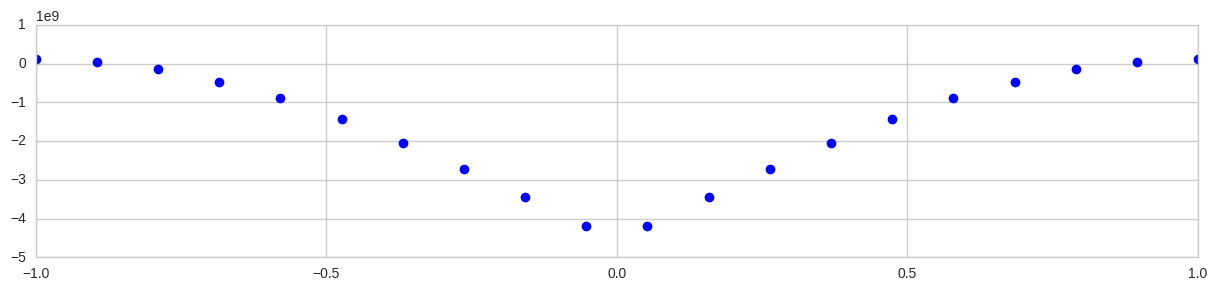

In [316]:
x= np.linspace(-1,1,theta.shape[0]*2)

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(x,I2,'bo')    

### What is the value of the coefficient μ which fits this data best?

In [94]:
import gatspy
from gatspy.periodic import LombScargleFast

f /= np.median(f)                 #normalize

model = LombScargleFast().fit(t, f)
periods, power = model.periodogram_auto(nyquist_factor=100)

In [95]:
idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak = periods[idx1][idx2]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 5),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak, *ax.get_ylim(), linestyles='dotted', colors='r')

TypeError: 'int' object is not subscriptable

### e. Bonus! This is a real exoplanet. Which one?

# 3.
Aliens are everywhere, and they have telescopes! Every single star within 25 parsecs of the Sun has an alien astronomer, and all of them are constantly monitoring the Sun.

### a. How many of these astronomers will be able to see a transit by the Earth?
The transit probability for an exoplanet is the probability that the planet would be observed to eclipse its parent star if the planet and its parent star were observed at random orientations with respect to the inclination angle of the planet's plane of orbit.

In [49]:
rho =0.01
d = 25 #pc

def N(rho, d):
    return rho* (4*np.pi*d**3)/3

N(rho, d)

654.4984694978735

In [24]:
def p_trans(R_s, R_p, a, e, w):
    return ((R_s+R_p)/a)*(1-e*np.sin(w))/(1-e**2)

p_trans(R_sun, R_Earth, AU, 0, 0.5*np.pi)

0.004696998663101604

In [43]:
n_Neptunes = int(N(rho, d) * p_trans(R_sun, R_Neptune, 30.1*AU, 0, 0.5*np.pi))
n_Earths = int(N(rho, d) * p_trans(R_sun, R_Earth, AU, 0, 0.5*np.pi))

print(n_Neptunes, n_Earths)

1 30


Using number of stars in Woolley + 2006 catalog, 

In [52]:
N_Woolley = 2150
n_Neptunes = int(N_Woolley * p_trans(R_sun, R_Neptune, 30.1*AU, 0, 0.5*np.pi))
n_Earths = int(N_Woolley * p_trans(R_sun, R_Earth, AU, 0, 0.5*np.pi))

print(n_Neptunes, n_Earths)

0 10


### b. How many of these astronomers will be able to see a transit by any planet?

We can assume a distribution of relevant parameters: r_planet = [], a_planet = []